In [1]:
#Import the fpga util file with all wrapper functions
import fpga_utils as fpga
import pandas as pd

['/home/centos/ml-suite/notebooks/pickle', '/home/centos/ml-suite/notebooks/parallel', '/home/centos/ml-suite/notebooks/bin', '/home/centos/ml-suite/notebooks/version', '/home/centos/ml-suite/notebooks/weights', '/home/centos/ml-suite/notebooks/optimizations', '/home/centos/ml-suite/notebooks/network', '/home/centos/ml-suite/notebooks/memory', '/home/centos/ml-suite/notebooks/graph', '/home/centos/ml-suite/notebooks/codegeneration', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../weights', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../version', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../tests', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../pickle', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../parallel', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../optimizations', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../network', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../memory', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../graph', '/home/centos/ml-suite

In [2]:
#Provide the Model checkpoint path
sProtoBufPath="/home/centos/models/tensorflow/bvlc_googlenet_without_lrn/fp32/bvlc_googlenet_without_lrn_test.pb"

# Initialize the array to store results
Inference_Data =[]

# Quantization Mode - 8 bit or 16 bit
Q_MODE = 16

# Number of images we want to carry inference on
NUM_IMAGES = 256

# Paramaeter to do recompile or use existing compiled model
DO_COMPILE = False

# Model Type = 'Tensorflow,Caffe'
MODEL_TYPE = 'Tensorflow'

#Execute  the model on FPGA
Inference_Data = fpga.executeOnFPGA(sProtoBufPath,Q_MODE,Inference_Data,NUM_IMAGES,DO_COMPILE,MODEL_TYPE)

#Converting to Pandas format for easier plotting and functions.
Inference_Data = pd.DataFrame(Inference_Data)

#Calculate Mean and std
Aggregated_Results = fpga.doAggregations(Inference_Data)

#Save the data locally
Aggregated_Results.to_csv('inception_v1_'+str(Q_MODE)+'bit.csv')
#Inference_Data.to_csv('inference_'+str(q_Mode)+'.csv')

Namespace(anew=None, approximate=False, banditpre=None, barrier=False, bridges=None, bytesperpixels=2, concatstrategy=None, conv_1x1_s2=False, cpulayermustgo=False, ddr=256, dedicateddsp=None, deephifilename=None, dsp=56, finalnode=u'prob', forceweights=None, fromtensorflow=False, generatefile='work/fpga_googleNet_16.cmds', godreplication=None, lasttensorbyname=None, loadpickle=None, manasadebugmode=False, manualbatch=False, manualdeconv=False, memory=5, networkfile='/home/centos/models/tensorflow/bvlc_googlenet_without_lrn/fp32/bvlc_googlenet_without_lrn_test.pb', nodynamicscaling=False, noreplication=False, parallelism=False, parallelismstrategy="['bottom', 'tops']", parallelread=None, pipelineconvmaxpool=False, placeholdershape=None, pngfile=None, poolingaround=False, rankdir='BT', savepickle=None, schedulefile=None, strategy='all', verbose=False, versionjson=None, weights=True)
Network: /home/centos/models/tensorflow/bvlc_googlenet_without_lrn/fp32/bvlc_googlenet_without_lrn_test.p

In [3]:
#Print execution results
Aggregated_Results

,batchSize_,imgsPerSecAll_mean,imgsPerSecAll_std,experiment_max,imgsPerSecAll_max,imgsPerSecAll_min
0,1,196.992432,0.316536,16_bit_mode,197.308968,196.675897
1,2,227.600940,0.672172,16_bit_mode,228.273112,226.928768
2,4,248.490741,0.400217,16_bit_mode,248.890959,248.090524
3,8,257.918383,1.116986,16_bit_mode,259.035369,256.801397
4,16,264.871578,1.223085,16_bit_mode,266.094663,263.648494
5,32,267.724937,1.502736,16_bit_mode,269.227672,266.222201
6,64,268.901863,3.151637,16_bit_mode,272.053500,265.750225


In [4]:
MultiModelResult= pd.read_csv('multinet_results.csv')
MultiModelResult=MultiModelResult.sort_values(by=['experiment','num_models_parallel'])
MultiModelResult

,duration_overall,experiment,imgsPerSecAll,num_models_parallel
7,0.423186,16_bit_mode,302.467427,1
6,0.437817,16_bit_mode,584.719057,2
5,0.456219,16_bit_mode,841.701103,3
4,0.472136,16_bit_mode,1084.433251,4
0,0.332858,8_bit_mode,384.548267,1
1,0.349589,8_bit_mode,732.288758,2
2,0.367411,8_bit_mode,1045.150682,3
3,0.383426,8_bit_mode,1335.328713,4


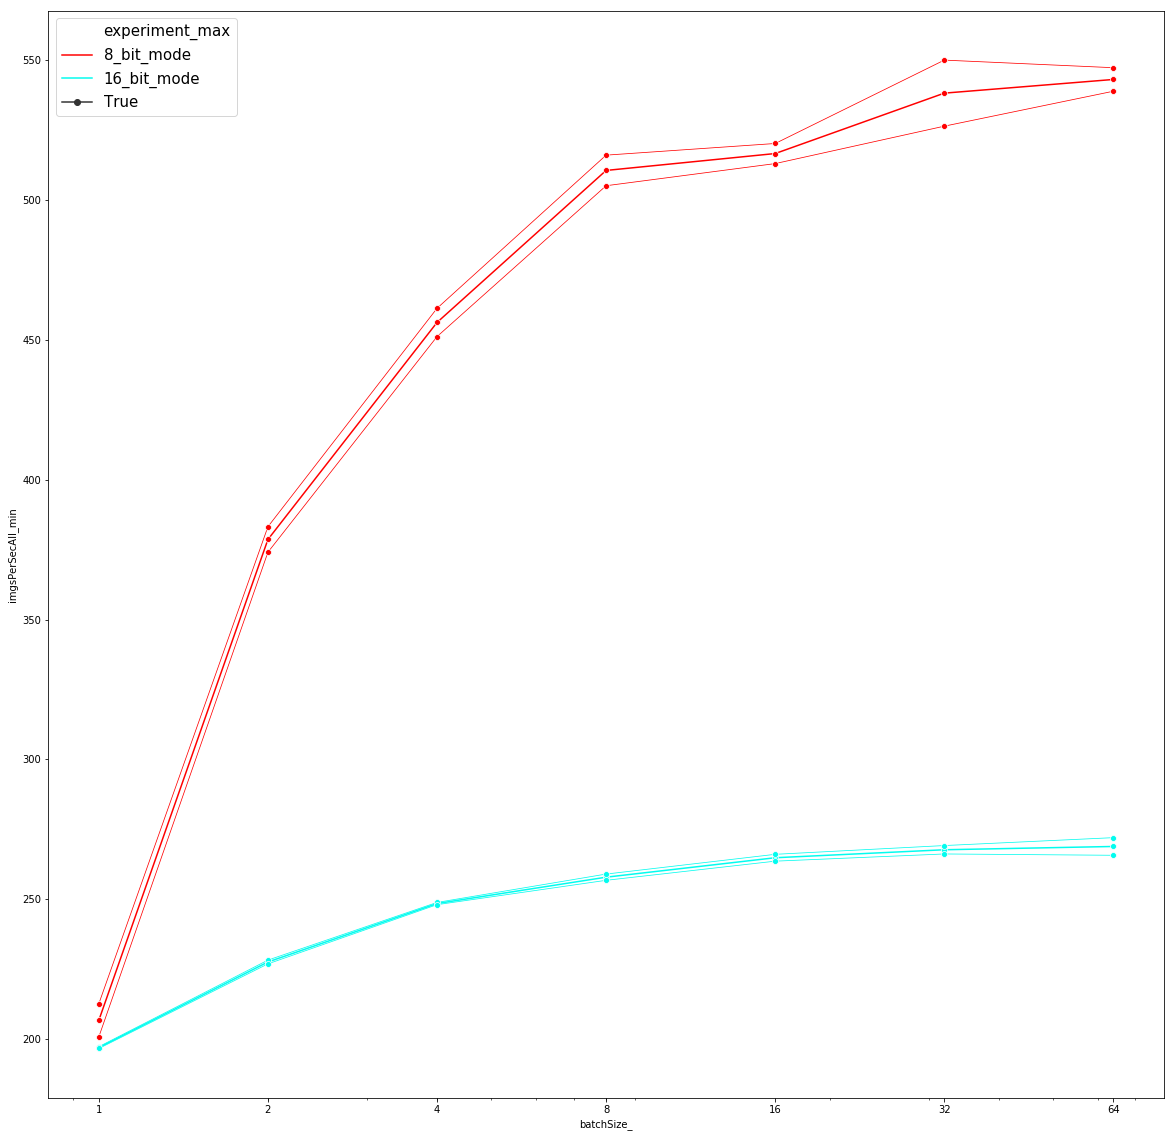

In [5]:
fpga.plotSingleModelInference('inception_v1')

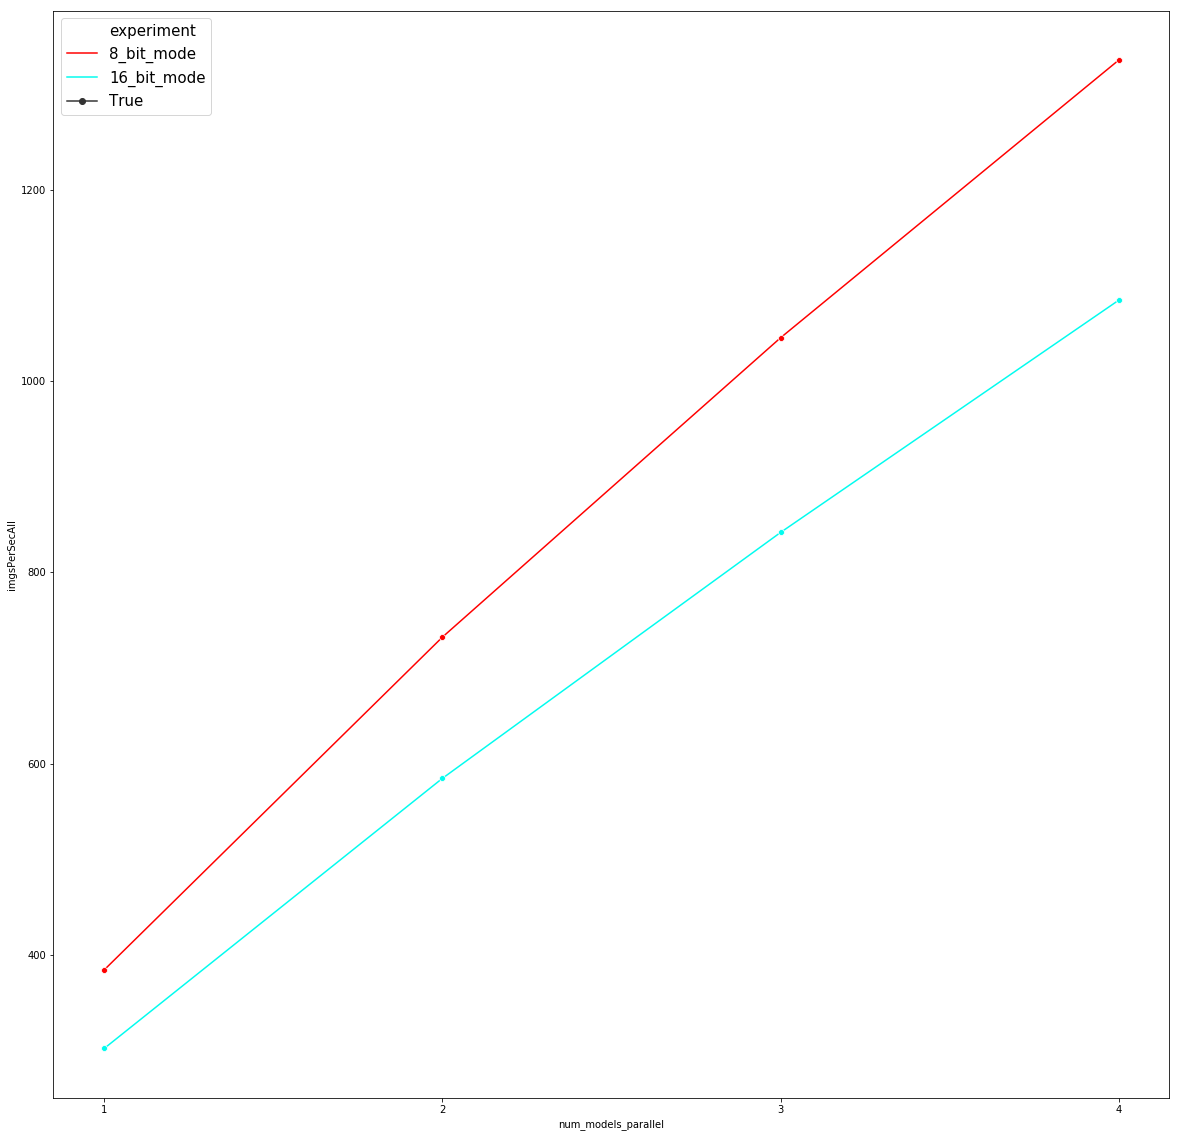

In [6]:
fpga.plotMultiModelInference()